In [88]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [89]:
F = len('Rafal')
L = len('Kosla')

## Excercise 1 -  Generated Quantities Block

In [90]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [91]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [92]:
df = samples.draws_pd()
print(df)

     lp__  accept_stat__     lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0     0.0            0.0   90.10770      91.0      92.0      83.0      76.0   
1     0.0            0.0  193.77800     190.0     201.0     209.0     194.0   
2     0.0            0.0  189.91100     183.0     211.0     191.0     228.0   
3     0.0            0.0    2.61976       1.0       0.0       2.0       4.0   
4     0.0            0.0   64.31160      68.0      59.0      71.0      68.0   
..    ...            ...        ...       ...       ...       ...       ...   
995   0.0            0.0   42.87430      39.0      40.0      46.0      41.0   
996   0.0            0.0  134.95600     139.0     137.0     146.0     129.0   
997   0.0            0.0  204.97300     202.0     190.0     220.0     201.0   
998   0.0            0.0   43.78050      45.0      49.0      36.0      51.0   
999   0.0            0.0   99.90220      87.0     102.0     102.0     112.0   

     y_sim[5]  
0       110.0  
1       197.0  
2  

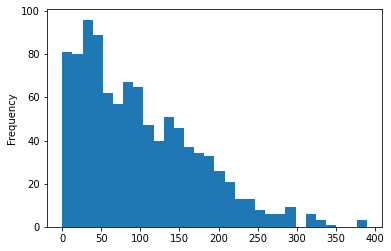

In [93]:
Lambda = df['lambda']

Lambda.plot.hist(bins=30)
plt.show()

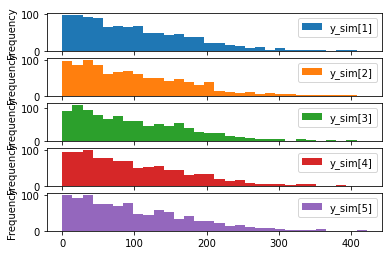

In [94]:
df2 = df.drop(df.columns[0:3],axis=1)
df2.plot.hist(subplots=True, bins=30)
plt.show()

## Excercise 2 - Constraints on the data 

In [95]:
bern1 = CmdStanModel(stan_file='code_2.stan')

samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
# set to [0,1] due to eror

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [96]:
bern2 = CmdStanModel(stan_file='code_3.stan')

# same as above
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


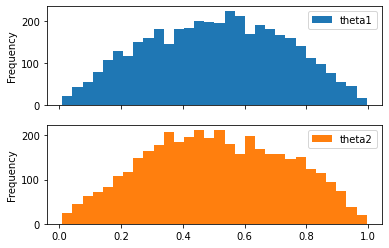

In [97]:
theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=30)
plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [98]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▍        | 00:00 Iteration:  800 / 7000 [ 11%]  (Warmup)
chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |███▊      | 00:00 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)

chain 1 |█████▊    | 00:00 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |███████   | 00:00 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 5600 / 7000 [ 80%]  (Sampling)


chain 1 |█████████▎| 00:01 Iteration: 6400 / 7000 [ 91%]  (Sampling)










chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /root/da/lab2/samples/code_4-20230322201808_1.csv, /root/da/lab2/samples/code_4-20230322201808_2.csv, /root/da/lab2/samples/code_4-20230322201808_3.csv, /root/da/lab2/samples/code_4-20230322201808_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9400 of 24000 (39.17%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

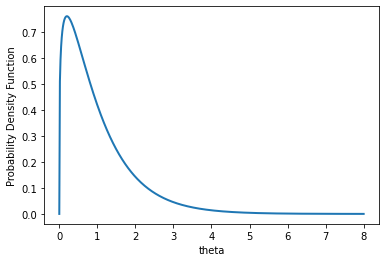

In [99]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [100]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration: 1400 / 7000 [ 20%]  (Sampling)
chain 1 |████▏     | 00:00 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |█████▌    | 00:00 Iteration: 3700 / 7000 [ 52%]  (Sampling)



chain 1 |██████▊   | 00:00 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▉  | 00:00 Iteration: 5400 / 7000 [ 77%]  (Sampling)


chain 1 |████████▉ | 00:00 Iteration: 6100 / 7000 [ 87%]  (Sampling)


chain 1 |█████████▊| 00:01 Iteration: 6800 / 7000 [ 97%]  (Sampling)





chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


'Processing csv files: /root/da/lab2/samples/code_5-20230322201814_1.csv, /root/da/lab2/samples/code_5-20230322201814_2.csv, /root/da/lab2/samples/code_5-20230322201814_3.csv, /root/da/lab2/samples/code_5-20230322201814_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

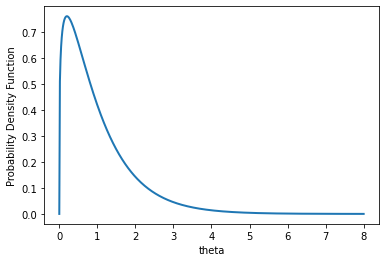

In [101]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

And there are no warning messages like in code_4

## Excercise 4 -  Selection of parameters using equation solving



In [102]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,1.94112


## Excercise 5 - different methods of defining models


In [103]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 18032000 
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


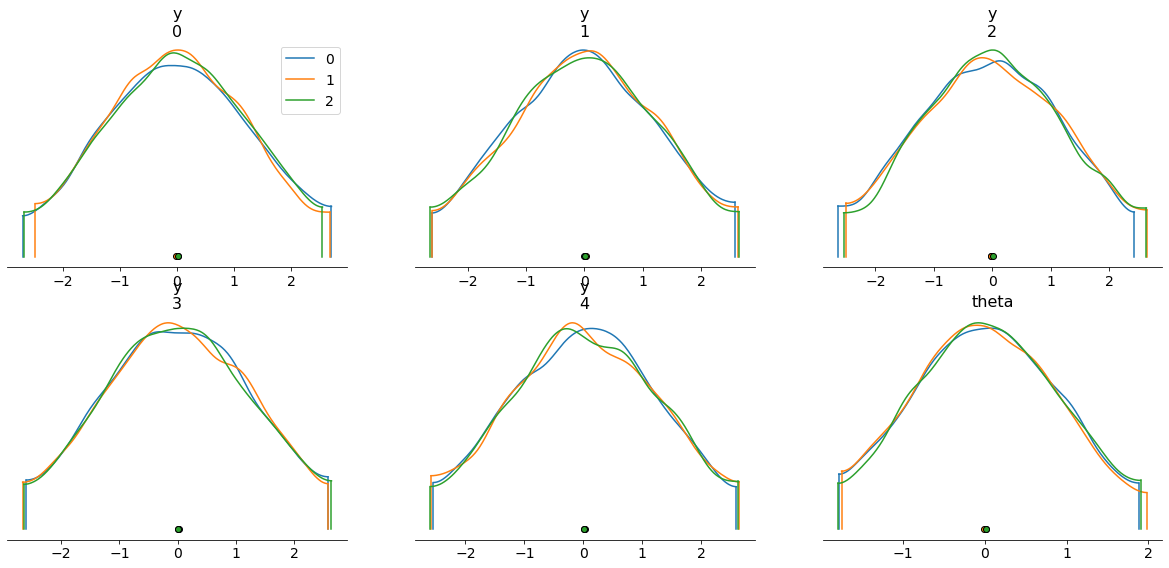

In [104]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


<AxesSubplot:ylabel='Frequency'>

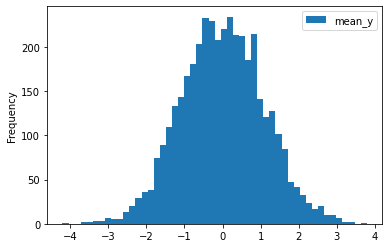

In [108]:
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
df = mean_of_y.draws_pd()
df.plot.hist(bins=50)